# <b><span style='color:#F1A424'>AutoML - Regression - House Price Prediction </span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    


The housing price dataset contains range of features associated with residential properties, including their physical attributes, amenities, and location-related characteristics. It is a common type of dataset used for regression or predictive modeling tasks in the field of real estate or housing market analysis. 

Here are some key details about the Housing dataset:

**Features**:

- `sn`: Serial number or identifier for each housing entry.
- `lotsize`: The size of the lot or land associated with the property, typically measured in square feet.
- `bedrooms`: The number of bedrooms in the house, indicating the sleeping spaces.
- `bathrms`: The number of bathrooms in the house, reflecting the sanitary facilities available.
- `stories`: The number of stories or levels in the house, indicating its vertical structure.
- `driveway`: A binary variable indicating the presence or absence of a driveway for vehicular access.
- `recroom`: A binary variable indicating whether the house has a recreation room.
- `fullbase`: A binary variable indicating the presence or absence of a full basement in the house.
- `gashw`: A binary variable indicating whether the house has a gas hot water heating system.
- `airco`: A binary variable indicating the presence or absence of air conditioning in the house.
- `garagepl`: The number of parking spaces available in the garage.
- `prefarea`: A binary variable indicating whether the house is located in a preferred or desirable area.
- `homestyle`: A categorical variable representing the style or type of the house.

**Target Variable**:

- `price`: The price of the house, representing the cost or value of the property.
        
**Objective**:

The main objective is typically to build a predictive model that can accurately predict prices of residential property based on various features. 

**Challenges**:

- Potential challenges in working with this dataset may include handling missing or skewed data.
- Managing categorical variables like 'homestyle' and addressing the complexities associated with predicting housing prices.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data("decisionforestpredict", ["housing_train", "housing_test"])

In [5]:
# Fetching in teradata dataframe
housing_train = DataFrame.from_table("housing_train")
housing_test = DataFrame.from_table("housing_test")

In [6]:
# Housing train dataset
housing_train.head()

sn,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,homestyle
3,49500.0,3060.0,3,1,1,yes,no,no,no,no,0,no,Classic
5,61000.0,6360.0,2,1,1,yes,no,no,no,no,0,no,Eclectic
6,66000.0,4160.0,3,1,1,yes,yes,yes,no,yes,0,no,Eclectic
7,66000.0,3880.0,3,2,2,yes,no,yes,no,no,2,no,Eclectic
9,83800.0,4800.0,3,1,1,yes,yes,yes,no,no,0,no,Eclectic
10,88500.0,5500.0,3,2,4,yes,yes,no,no,yes,1,no,Eclectic
8,69000.0,4160.0,3,1,3,yes,no,no,no,no,0,no,Eclectic
4,60500.0,6650.0,3,1,2,yes,yes,no,no,no,0,no,Eclectic
2,38500.0,4000.0,2,1,1,yes,no,no,no,no,0,no,Classic
1,42000.0,5850.0,3,1,2,yes,no,yes,no,no,1,no,Classic


In [7]:
# Housing train dataset shape
housing_train.shape

(492, 14)

In [8]:
# Housing test dataset
housing_test.head()

sn,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,homestyle
25,42000.0,4960.0,2,1,1,yes,no,no,no,no,0,no,Classic
53,68000.0,9166.0,2,1,1,yes,no,yes,no,yes,2,no,Eclectic
111,43000.0,5076.0,3,1,1,no,no,no,no,no,0,no,Classic
117,93000.0,3760.0,3,1,2,yes,no,no,yes,no,2,no,Eclectic
140,43000.0,3750.0,3,1,2,yes,no,no,no,no,0,no,Classic
142,40000.0,2650.0,3,1,2,yes,no,yes,no,no,1,no,Classic
132,44500.0,3850.0,3,1,2,yes,no,no,no,no,0,no,Classic
38,67000.0,5170.0,3,1,4,yes,no,no,no,yes,0,no,Eclectic
16,37900.0,3185.0,2,1,1,yes,no,no,no,yes,0,no,Classic
13,27000.0,1700.0,3,1,2,yes,no,no,no,no,0,no,Classic


In [9]:
# Housing test dataset shape
housing_test.shape

(46, 14)

## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [10]:
# Creating AutoML instance with task type 'Regression'
# Excluding knn , glm and svm from model training
# Keeping early stopping metrics threshold to 0.7 for 'R2', early stopping timer threshold to 100 sec
# and verbose level 2 for detailed loggging

aml = AutoML(task_type="Regression",
             exclude=['knn', 'glm', 'svm'],
             verbose=2,
             max_runtime_secs=100,
             stopping_metric='R2',
             stopping_tolerance=0.7)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 492
Total Columns in the data: 14

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
prefarea,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
lotsize,FLOAT,492,0,None,0,492,0,0.0,100.0
stories,INTEGER,492,0,None,0,492,0,0.0,100.0
fullbase,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
gashw,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
garagepl,INTEGER,492,0,None,270,222,0,0.0,100.0
homestyle,VARCHAR(20) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
sn,INTEGER,492,0,None,0,492,0,0.0,100.0
airco,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
bedrooms,INTEGER,492,0,None,0,492,0,0.0,100.0


            sn       price    lotsize  bedrooms  bathrms  stories  garagepl
func                                                                       
50%    274.000   62000.000   4616.000     3.000    1.000    2.000     0.000
count  492.000     492.000    492.000   492.000  492.000  492.000   492.000
mean   272.943   68100.396   5181.795     2.965    1.293    1.803     0.685
min      1.000   25000.000   1650.000     1.000    1.000    1.000     0.000
max    546.000  190000.000  16200.000     6.000    4.000    4.000     3.000
75%    413.250   82000.000   6370.000     3.000    2.000    2.000     1.000
25%    132.500   49975.000   3600.000     2.000    1.000    1.000     0.000
std    159.501   26472.496   2182.443     0.731    0.510    0.861     0.854

Statistics of Data:


func,sn,price,lotsize,bedrooms,bathrms,stories,garagepl
50%,274,62000,4616,3,1,2,0
count,492,492,492,492,492,492,492
mean,272.943,68100.396,5181.795,2.965,1.293,1.803,0.685
min,1,25000,1650,1,1,1,0
max,546,190000,16200,6,4,4,3
75%,413.25,82000,6370,3,2,2,1
25%,132.5,49975,3600,2,1,1,0
std,159.501,26472.496,2182.443,0.731,0.51,0.861,0.854



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
driveway                  2         
recroom                   2         
fullbase                  2         
gashw                     2         
airco                     2         
prefarea                  2         
homestyle                 3         

No Futile columns found.

Target Column Distribution:


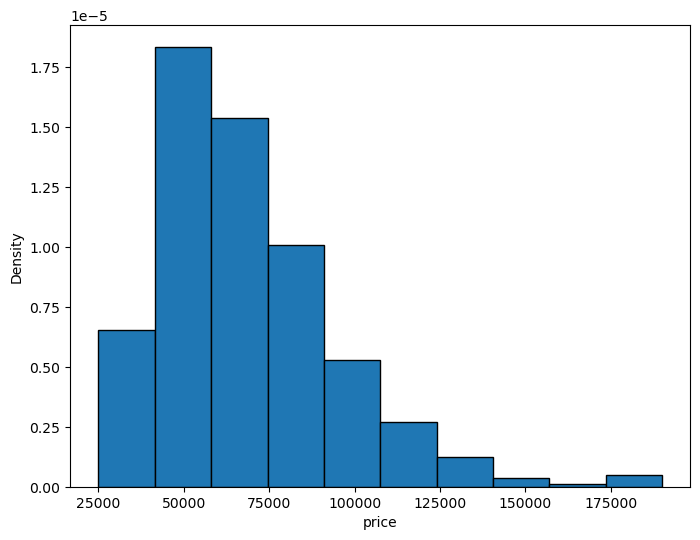

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0      price           2.439024
1    stories           7.113821
2   bedrooms           2.235772
3    lotsize           2.235772
4   garagepl           2.235772
5    bathrms           0.203252


Analysis completed. No action taken.                                                    


Analysis indicates all categorical columns are significant. No action Needed.           


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea', 'homestyle']


sn,price,lotsize,bedrooms,bathrms,stories,driveway_0,driveway_1,recroom_0,recroom_1,fullbase_0,fullbase_1,gashw_0,gashw_1,airco_0,airco_1,garagepl,prefarea_0,prefarea_1,homestyle_0,homestyle_1,homestyle_2,id
202,53900.0,2520.0,5,2,1,1,0,1,0,0,1,1,0,0,1,1,1,0,0,0,1,31
282,74500.0,4500.0,4,2,1,1,0,1,0,0,1,1,0,0,1,2,1,0,0,0,1,47
78,47000.0,3180.0,4,1,2,0,1,1,0,0,1,1,0,0,1,0,1,0,0,1,0,55
139,26500.0,2990.0,2,1,1,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,63
179,74500.0,3180.0,3,2,2,0,1,1,0,1,0,1,0,1,0,2,1,0,0,0,1,79
97,53900.0,8250.0,3,1,1,0,1,1,0,1,0,1,0,1,0,2,1,0,0,0,1,87
322,88500.0,6350.0,3,2,3,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,1,71
528,106000.0,6325.0,3,1,4,0,1,1,0,1,0,1,0,0,1,1,1,0,1,0,0,39
223,70100.0,4200.0,3,1,2,0,1,1,0,1,0,1,0,1,0,1,1,0,0,0,1,23
427,49500.0,5320.0,2,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,15


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    lotsize           2.235772
1   garagepl           2.235772
2    bathrms           0.203252
3    stories           7.113821
4      price           2.439024
5   bedrooms           2.235772


['price', 'bathrms', 'garagepl', 'bedrooms', 'lotsize', 'stories']


sn,price,lotsize,bedrooms,bathrms,stories,driveway_0,driveway_1,recroom_0,recroom_1,fullbase_0,fullbase_1,gashw_0,gashw_1,airco_0,airco_1,garagepl,prefarea_0,prefarea_1,homestyle_0,homestyle_1,homestyle_2,id
282,74500.0,4500.0,4,2,1,1,0,1,0,0,1,1,0,0,1,2,1,0,0,0,1,47
139,26500.0,2990.0,2,1,1,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,63
322,88500.0,6350.0,3,2,3,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,1,71
179,74500.0,3180.0,3,2,2,0,1,1,0,1,0,1,0,1,0,2,1,0,0,0,1,79
15,37000.0,3600.0,2,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,95
280,52000.0,5960.0,3,1,2,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,103
97,53900.0,8250.0,3,1,1,0,1,1,0,1,0,1,0,1,0,2,1,0,0,0,1,87
78,47000.0,3180.0,4,1,2,0,1,1,0,0,1,1,0,0,1,0,1,0,0,1,0,55
223,70100.0,4200.0,3,1,2,0,1,1,0,1,0,1,0,1,0,1,1,0,0,0,1,23
427,49500.0,5320.0,2,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,15


['airco_0', 'homestyle_1', 'homestyle_2', 'prefarea_0', 'recroom_0', 'sn', 'bathrms', 'gashw_0', 'airco_1', 'driveway_0', 'homestyle_0', 'garagepl', 'bedrooms', 'gashw_1', 'stories', 'fullbase_0', 'fullbase_1', 'lotsize']


['sn', 'bathrms', 'garagepl', 'bedrooms', 'stories', 'lotsize']


airco_0,homestyle_1,gashw_1,homestyle_2,prefarea_0,id,homestyle_0,recroom_0,price,gashw_0,fullbase_0,airco_1,driveway_0,fullbase_1,sn,bathrms,garagepl,bedrooms,stories,lotsize
1,0,0,1,1,10,0,1,54500.0,1,0,0,1,1,-1.4054622327473343,1.7271115861320958,-0.7575814075373921,-1.3175958030479806,-0.9913469784128766,-0.9180289424247704
0,0,0,1,1,12,0,1,63900.0,1,0,1,0,1,-1.146424878727206,-0.5101621915959424,0.5442217458227795,-1.3175958030479806,-0.9913469784128766,0.8787510949440291
0,0,0,1,1,13,0,1,99000.0,1,0,1,0,1,0.4466548484965834,1.7271115861320958,0.5442217458227795,0.2063268153124581,0.5895510439803847,2.289307385962526
1,1,0,0,1,14,0,1,48000.0,1,1,0,0,0,-1.2694676218867669,-0.5101621915959424,-0.7575814075373921,-1.3175958030479806,0.5895510439803847,-0.3750767192946347
0,0,0,1,1,16,0,1,87000.0,1,1,1,0,0,1.6317507431386706,-0.5101621915959424,1.8460248991829513,0.2063268153124581,2.170449066373646,2.004957149519115
0,0,0,1,1,17,0,1,57000.0,1,0,1,1,1,-1.0104302678666386,1.7271115861320958,-0.7575814075373921,0.2063268153124581,0.5895510439803847,-0.1623737865220042
1,1,0,0,0,15,0,1,49500.0,1,1,0,0,0,1.1007241673974075,-0.5101621915959424,0.5442217458227795,-1.3175958030479806,-0.9913469784128766,0.2966167526189352
1,0,0,1,1,11,0,1,80000.0,1,1,0,0,0,-0.8744356570060712,1.7271115861320958,0.5442217458227795,1.7302494336728969,0.5895510439803847,3.1960935730458453
1,1,0,0,1,9,0,1,50000.0,1,1,0,0,0,0.051622883615887676,-0.5101621915959424,0.5442217458227795,-1.3175958030479806,-0.9913469784128766,-0.6437541080600627
1,0,0,1,1,8,0,1,58000.0,1,1,0,0,0,-0.4794036921253754,-0.5101621915959424,-0.7575814075373921,0.2063268153124581,-0.9913469784128766,-0.2519329161104802


['homestyle_1', 'homestyle_2', 'sn', 'bathrms', 'airco_1', 'homestyle_0', 'garagepl', 'bedrooms', 'stories', 'lotsize']


['r_sn', 'r_bathrms', 'r_garagepl', 'r_bedrooms', 'r_stories', 'r_lotsize']


r_homestyle_2,id,price,r_homestyle_0,r_airco_1,r_homestyle_1,r_sn,r_bathrms,r_garagepl,r_bedrooms,r_stories,r_lotsize
1,10,54500.0,0,0,0,-1.4054622327473343,1.7271115861320958,-0.7575814075373921,-1.3175958030479806,-0.9913469784128766,-0.9180289424247704
1,12,63900.0,0,1,0,-1.146424878727206,-0.5101621915959424,0.5442217458227795,-1.3175958030479806,-0.9913469784128766,0.8787510949440291
1,13,99000.0,0,1,0,0.4466548484965834,1.7271115861320958,0.5442217458227795,0.2063268153124581,0.5895510439803847,2.289307385962526
0,14,48000.0,0,0,1,-1.2694676218867669,-0.5101621915959424,-0.7575814075373921,-1.3175958030479806,0.5895510439803847,-0.3750767192946347
1,16,87000.0,0,1,0,1.6317507431386706,-0.5101621915959424,1.8460248991829513,0.2063268153124581,2.170449066373646,2.004957149519115
1,17,57000.0,0,1,0,-1.0104302678666386,1.7271115861320958,-0.7575814075373921,0.2063268153124581,0.5895510439803847,-0.1623737865220042
0,15,49500.0,0,0,1,1.1007241673974075,-0.5101621915959424,0.5442217458227795,-1.3175958030479806,-0.9913469784128766,0.2966167526189352
1,11,80000.0,0,0,0,-0.8744356570060712,1.7271115861320958,0.5442217458227795,1.7302494336728969,0.5895510439803847,3.1960935730458453
0,9,50000.0,0,0,1,0.051622883615887676,-0.5101621915959424,0.5442217458227795,-1.3175958030479806,-0.9913469784128766,-0.6437541080600627
1,8,58000.0,0,0,0,-0.4794036921253754,-0.5101621915959424,-0.7575814075373921,0.2063268153124581,-0.9913469784128766,-0.2519329161104802


['sn', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl']


recroom_1,airco_0,homestyle_1,gashw_1,homestyle_2,driveway_1,prefarea_0,prefarea_1,id,homestyle_0,recroom_0,price,gashw_0,fullbase_0,airco_1,driveway_0,fullbase_1,sn,lotsize,bedrooms,bathrms,stories,garagepl
0,1,1,0,0,1,1,0,9,0,1,50000.0,1,1,0,0,0,0.051622883615887676,-0.6437541080600625,-1.317595803047977,-0.5101621915959411,-0.9913469784128749,0.5442217458227792
0,1,0,0,1,0,1,0,10,0,1,54500.0,1,0,0,1,1,-1.4054622327473343,-0.9180289424247702,-1.317595803047977,1.7271115861320911,-0.9913469784128749,-0.7575814075373916
0,1,0,0,1,1,1,0,26,0,1,52000.0,1,0,0,0,1,-0.36931281666682086,-0.6829362272550208,0.20632681531245756,-0.5101621915959411,0.5895510439803837,-0.7575814075373916
0,1,1,0,0,1,0,1,15,0,1,49500.0,1,1,0,0,0,1.1007241673974075,0.29661675261893516,-1.317595803047977,-0.5101621915959411,-0.9913469784128749,0.5442217458227792
0,1,0,0,1,1,1,0,11,0,1,80000.0,1,1,0,0,0,-0.8744356570060712,3.196093573045845,1.7302494336728922,1.7271115861320911,0.5895510439803837,0.5442217458227792
0,0,0,0,0,1,0,1,27,1,1,120000.0,1,0,1,0,1,1.236718778257975,0.39737077340597066,1.7302494336728922,1.7271115861320911,0.5895510439803837,0.5442217458227792
0,1,0,0,1,1,1,0,8,0,1,58000.0,1,1,0,0,0,-0.4794036921253754,-0.25193291611048013,0.20632681531245756,-0.5101621915959411,-0.9913469784128749,-0.7575814075373916
0,0,0,0,1,1,1,0,16,0,1,87000.0,1,1,1,0,0,1.6317507431386706,2.004957149519114,0.20632681531245756,-0.5101621915959411,2.170449066373642,1.84602489918295
0,1,1,0,0,1,1,0,14,0,1,48000.0,1,1,0,0,0,-1.2694676218867669,-0.3750767192946346,-1.317595803047977,-0.5101621915959411,0.5895510439803837,-0.7575814075373916
0,1,1,0,0,1,1,0,22,0,1,27000.0,1,1,0,0,0,-0.0843717272446797,-0.6387164070207108,-1.317595803047977,-0.5101621915959411,-0.9913469784128749,-0.7575814075373916


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9', 'col_10']


response_column : price                                                                                                                               
name : xgboost
model_type : Regression
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2, 0.3)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.01, 0.05, 0.1)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
iter_num : (10, 20, 30, 40)
seed : 42
Total number of models for xgboost : 10240
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : price
name : decision_forest
tree_type : Regression
min_impurity : (0.0, 0.1, 0.2, 0.3)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
num_trees : (-1, 20, 30, 40)
seed : 42
Total number of models for decision_forest : 320
-------------------------------------------------------------------------------------

,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,XGBOOST_0,lasso,6640.729539,8.381567e+07,0.024194,11.699538,-2.303463,9155.089728,0.155546,32011.316254,0.767821,0.768248,1350.223253,0.023587,0.757425
1,2,XGBOOST_3,lasso,6640.729539,8.381567e+07,0.024194,11.699538,-2.303463,9155.089728,0.155546,32011.316254,0.767821,0.768248,1350.223253,0.023587,0.757425
2,3,DECISIONFOREST_0,lasso,7217.464057,8.961653e+07,0.023486,12.169350,-1.641086,9466.600977,0.153251,27811.538462,0.751752,0.751758,1382.746065,0.023525,0.740636
3,4,DECISIONFOREST_1,rfe,7172.322420,9.241116e+07,0.024042,12.126098,-1.475958,9613.072566,0.155054,27811.538462,0.744010,0.744033,1417.341141,0.023941,0.737767
4,5,XGBOOST_1,rfe,6930.716300,9.267134e+07,0.025747,11.955202,-1.639779,9626.595436,0.160457,34372.991548,0.743290,0.743305,1471.137222,0.025598,0.737028
5,6,DECISIONFOREST_3,lasso,8444.172549,1.271166e+08,0.030063,14.331596,-4.661477,11274.601114,0.173388,36115.000000,0.647872,0.649860,1857.379849,0.029634,0.632105
6,7,DECISIONFOREST_2,pca,8539.230818,1.507301e+08,0.033673,14.426075,-5.668495,12277.218445,0.183501,42170.000000,0.582460,0.592381,2143.056974,0.032648,0.571230
7,8,XGBOOST_2,pca,8343.664629,1.559985e+08,0.037137,14.679852,-5.005181,12489.934338,0.192711,51690.267244,0.567866,0.574629,2232.426199,0.034528,0.556244


In [11]:
# Fitting train data
aml.fit(housing_train,housing_train.price)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [12]:
# Fetching Leaderboard
aml.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,XGBOOST_0,lasso,6640.729539,8.381567e+07,0.024194,11.699538,-2.303463,9155.089728,0.155546,32011.316254,0.767821,0.768248,1350.223253,0.023587,0.757425
1,2,XGBOOST_3,lasso,6640.729539,8.381567e+07,0.024194,11.699538,-2.303463,9155.089728,0.155546,32011.316254,0.767821,0.768248,1350.223253,0.023587,0.757425
2,3,DECISIONFOREST_0,lasso,7217.464057,8.961653e+07,0.023486,12.169350,-1.641086,9466.600977,0.153251,27811.538462,0.751752,0.751758,1382.746065,0.023525,0.740636
3,4,DECISIONFOREST_1,rfe,7172.322420,9.241116e+07,0.024042,12.126098,-1.475958,9613.072566,0.155054,27811.538462,0.744010,0.744033,1417.341141,0.023941,0.737767
4,5,XGBOOST_1,rfe,6930.716300,9.267134e+07,0.025747,11.955202,-1.639779,9626.595436,0.160457,34372.991548,0.743290,0.743305,1471.137222,0.025598,0.737028
5,6,DECISIONFOREST_3,lasso,8444.172549,1.271166e+08,0.030063,14.331596,-4.661477,11274.601114,0.173388,36115.000000,0.647872,0.649860,1857.379849,0.029634,0.632105
6,7,DECISIONFOREST_2,pca,8539.230818,1.507301e+08,0.033673,14.426075,-5.668495,12277.218445,0.183501,42170.000000,0.582460,0.592381,2143.056974,0.032648,0.571230
7,8,XGBOOST_2,pca,8343.664629,1.559985e+08,0.037137,14.679852,-5.005181,12489.934338,0.192711,51690.267244,0.567866,0.574629,2232.426199,0.034528,0.556244


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [13]:
# Fetching best performing model for dataset
aml.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,XGBOOST_0,lasso,6640.729539,8.381567e+07,0.024194,11.699538,-2.303463,9155.089728,0.155546,32011.316254,0.767821,0.768248,1350.223253,0.023587,0.757425


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [14]:
aml.model_hyperparameters(rank=2)

{'response_column': 'price',
 'name': 'xgboost',
 'model_type': 'Regression',
 'column_sampling': 1,
 'min_impurity': 0.0,
 'lambda1': 0.01,
 'shrinkage_factor': 0.5,
 'max_depth': 5,
 'min_node_size': 1,
 'iter_num': 20,
 'seed': 42,
 'persist': False}

In [15]:
aml.model_hyperparameters(rank=6)

{'response_column': 'price',
 'name': 'decision_forest',
 'tree_type': 'Regression',
 'min_impurity': 0.0,
 'max_depth': 5,
 'min_node_size': 1,
 'num_trees': 20,
 'seed': 42,
 'persist': False}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction and Performance Metrics : </b>

In [16]:
# Generating prediction on test data
prediction = aml.predict(housing_test)

Data Transformation started ...


sn,price,lotsize,bedrooms,bathrms,stories,driveway_0,driveway_1,recroom_0,recroom_1,fullbase_0,fullbase_1,gashw_0,gashw_1,airco_0,airco_1,garagepl,prefarea_0,prefarea_1,homestyle_0,homestyle_1,homestyle_2,id
53,68000.0,9166.0,2,1,1,0,1,1,0,0,1,1,0,0,1,2,1,0,0,0,1,11
38,67000.0,5170.0,3,1,4,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,1,12
198,40500.0,4350.0,3,1,2,1,0,1,0,1,0,0,1,1,0,1,1,0,0,1,0,20
301,55000.0,4080.0,2,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,9
251,48500.0,3450.0,3,1,1,0,1,1,0,0,1,1,0,1,0,2,1,0,0,1,0,14
408,87500.0,6420.0,3,1,3,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,1,22
255,61000.0,4360.0,4,1,2,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,15
16,37900.0,3185.0,2,1,1,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,23
260,41000.0,6000.0,2,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,10
540,85000.0,7320.0,4,2,2,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,18


id,airco_0,homestyle_1,homestyle_2,prefarea_0,recroom_0,sn,bathrms,gashw_0,airco_1,driveway_0,homestyle_0,garagepl,bedrooms,gashw_1,stories,fullbase_0,fullbase_1,lotsize,price
18,1,0,1,1,1,540,2,1,0,0,0,0,4,0,2,1,0,7320.0,85000.0
39,1,0,1,0,1,441,1,1,0,0,0,2,3,0,1,1,0,3520.0,51900.0
47,1,1,0,1,1,132,1,1,0,0,0,0,3,0,2,1,0,3850.0,44500.0
9,1,0,1,1,1,301,1,1,0,0,0,0,2,0,1,1,0,4080.0,55000.0
25,1,1,0,1,1,249,1,1,0,0,0,0,2,0,1,1,0,3500.0,44500.0
33,1,0,1,0,1,411,1,1,0,0,0,1,3,0,1,0,1,9000.0,90000.0
23,0,1,0,1,1,16,1,1,1,0,0,0,2,0,1,1,0,3185.0,37900.0
49,0,0,1,1,1,161,1,1,1,0,0,1,3,0,2,1,0,3162.0,63900.0
11,0,0,1,1,1,53,1,1,1,0,0,2,2,0,1,0,1,9166.0,68000.0
19,0,0,1,0,1,440,1,1,1,0,0,2,3,0,2,1,0,6862.0,69000.0


airco_0,homestyle_1,gashw_1,homestyle_2,prefarea_0,id,homestyle_0,recroom_0,price,gashw_0,fullbase_0,airco_1,driveway_0,fullbase_1,sn,bathrms,garagepl,bedrooms,stories,lotsize
1,0,0,1,1,18,0,1,85000.0,1,1,0,0,0,1.83250469250427,1.7271115861320958,-0.7575814075373921,1.7302494336728969,0.5895510439803847,1.4161058724748852
1,0,0,1,0,39,0,1,51900.0,1,1,0,0,0,1.1913872413044524,-0.5101621915959424,1.8460248991829513,0.2063268153124581,-0.9913469784128766,-0.7109234552514196
1,1,0,0,1,47,0,1,44500.0,1,1,0,0,0,-0.809676318501039,-0.5101621915959424,-0.7575814075373921,0.2063268153124581,0.5895510439803847,-0.526207750475188
1,0,0,1,1,9,0,1,55000.0,1,1,0,0,0,0.2847565022340032,-0.5101621915959424,-0.7575814075373921,-1.3175958030479806,-0.9913469784128766,-0.3974665016917537
1,1,0,0,1,25,0,1,44500.0,1,1,0,0,0,-0.05199205799216366,-0.5101621915959424,-0.7575814075373921,-1.3175958030479806,-0.9913469784128766,-0.7221183464499792
1,0,0,1,0,33,0,1,90000.0,1,0,0,0,1,0.9971092257893561,-0.5101621915959424,0.5442217458227795,0.2063268153124581,-0.9913469784128766,2.356476733153883
0,1,0,0,1,23,0,1,37900.0,1,1,1,0,0,-1.5608846451594112,-0.5101621915959424,-0.7575814075373921,-1.3175958030479806,-0.9913469784128766,-0.8984378828272913
0,0,0,1,1,49,0,1,63900.0,1,1,1,0,0,-0.621874236836446,-0.5101621915959424,0.5442217458227795,0.2063268153124581,0.5895510439803847,-0.9113120077056347
0,0,0,1,1,11,0,1,68000.0,1,0,1,0,1,-1.3212750926907926,-0.5101621915959424,1.8460248991829513,-1.3175958030479806,-0.9913469784128766,2.449394330101927
0,0,0,1,0,19,0,1,69000.0,1,1,1,0,0,1.1849113074539492,-0.5101621915959424,1.8460248991829513,0.2063268153124581,0.5895510439803847,1.1597428640278726


id,homestyle_1,homestyle_2,sn,bathrms,airco_1,homestyle_0,garagepl,bedrooms,stories,lotsize,price
18,0,1,540,2,0,0,0,4,2,7320.0,85000.0
39,0,1,441,1,0,0,2,3,1,3520.0,51900.0
47,1,0,132,1,0,0,0,3,2,3850.0,44500.0
9,0,1,301,1,0,0,0,2,1,4080.0,55000.0
25,1,0,249,1,0,0,0,2,1,3500.0,44500.0
33,0,1,411,1,0,0,1,3,1,9000.0,90000.0
23,1,0,16,1,1,0,0,2,1,3185.0,37900.0
49,0,1,161,1,1,0,1,3,2,3162.0,63900.0
11,0,1,53,1,1,0,2,2,1,9166.0,68000.0
19,0,1,440,1,1,0,2,3,2,6862.0,69000.0


r_homestyle_2,id,price,r_homestyle_0,r_airco_1,r_homestyle_1,r_sn,r_bathrms,r_garagepl,r_bedrooms,r_stories,r_lotsize
1,18,85000.0,0,0,0,1.83250469250427,1.7271115861320958,-0.7575814075373921,1.7302494336728969,0.5895510439803847,1.4161058724748852
1,39,51900.0,0,0,0,1.1913872413044524,-0.5101621915959424,1.8460248991829513,0.2063268153124581,-0.9913469784128766,-0.7109234552514196
0,47,44500.0,0,0,1,-0.809676318501039,-0.5101621915959424,-0.7575814075373921,0.2063268153124581,0.5895510439803847,-0.526207750475188
1,9,55000.0,0,0,0,0.2847565022340032,-0.5101621915959424,-0.7575814075373921,-1.3175958030479806,-0.9913469784128766,-0.3974665016917537
0,25,44500.0,0,0,1,-0.05199205799216366,-0.5101621915959424,-0.7575814075373921,-1.3175958030479806,-0.9913469784128766,-0.7221183464499792
1,33,90000.0,0,0,0,0.9971092257893561,-0.5101621915959424,0.5442217458227795,0.2063268153124581,-0.9913469784128766,2.356476733153883
0,23,37900.0,0,1,1,-1.5608846451594112,-0.5101621915959424,-0.7575814075373921,-1.3175958030479806,-0.9913469784128766,-0.8984378828272913
1,49,63900.0,0,1,0,-0.621874236836446,-0.5101621915959424,0.5442217458227795,0.2063268153124581,0.5895510439803847,-0.9113120077056347
1,11,68000.0,0,1,0,-1.3212750926907926,-0.5101621915959424,1.8460248991829513,-1.3175958030479806,-0.9913469784128766,2.449394330101927
1,19,69000.0,0,1,0,1.1849113074539492,-0.5101621915959424,1.8460248991829513,0.2063268153124581,0.5895510439803847,1.1597428640278726


recroom_1,airco_0,homestyle_1,gashw_1,homestyle_2,driveway_1,prefarea_0,prefarea_1,id,homestyle_0,recroom_0,price,gashw_0,fullbase_0,airco_1,driveway_0,fullbase_1,sn,lotsize,bedrooms,bathrms,stories,garagepl
0,0,0,0,1,1,1,0,11,0,1,68000.0,1,0,1,0,1,-1.3212750926907926,2.449394330101926,-1.317595803047977,-0.5101621915959411,-0.9913469784128749,1.84602489918295
0,0,0,0,1,1,1,0,29,0,1,64000.0,1,1,1,0,0,0.31713617148651924,0.6128724289782409,-1.317595803047977,-0.5101621915959411,-0.9913469784128749,0.5442217458227792
0,0,0,0,1,1,1,0,61,0,1,60000.0,1,1,1,0,0,-0.01961238873964762,-0.10639933052920669,0.20632681531245756,1.7271115861320911,0.5895510439803837,0.5442217458227792
0,0,0,0,1,1,1,0,12,0,1,67000.0,1,1,1,0,0,-1.4184141004483406,0.21265506862973893,0.20632681531245756,-0.5101621915959411,3.7513470887669005,-0.7575814075373916
1,0,0,0,1,1,0,1,40,0,0,92500.0,1,0,1,0,1,0.932349887284324,1.4664828828684024,0.20632681531245756,-0.5101621915959411,-0.9913469784128749,1.84602489918295
1,0,0,0,1,1,0,1,32,0,0,77500.0,1,0,1,0,1,0.9453017549853304,1.1390323153105373,0.20632681531245756,-0.5101621915959411,-0.9913469784128749,-0.7575814075373916
1,1,0,0,1,1,1,0,24,0,0,64900.0,1,0,0,0,1,0.10990628827041656,-0.3862716104931941,-1.317595803047977,1.7271115861320911,-0.9913469784128749,-0.7575814075373916
0,1,1,0,0,1,1,0,10,0,1,41000.0,1,1,0,0,0,0.019243214363371633,0.677243053369958,-1.317595803047977,-0.5101621915959411,-0.9913469784128749,-0.7575814075373916
0,1,0,0,1,1,1,0,18,0,1,85000.0,1,1,0,0,0,1.83250469250427,1.4161058724748847,1.7302494336728922,1.7271115861320911,0.5895510439803837,-0.7575814075373916
0,1,0,0,1,1,1,0,26,0,1,86900.0,1,1,0,0,0,0.6344569301611764,-0.27432269850759916,4.778094670393761,1.7271115861320911,0.5895510439803837,-0.7575814075373916


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,price
0,24,-0.254411,0.449359,0.798747,2.408292,-0.778557,0.263065,0.921262,-0.455394,-0.176837,-0.010335,0.811939,64900.0
1,23,-2.471745,0.174682,0.523237,0.189115,0.430485,0.301048,0.469823,1.219421,0.263411,-0.709902,-0.028935,37900.0
2,10,-1.351342,1.320579,-0.380456,0.467459,0.662415,0.830990,-0.301989,-0.242817,0.332596,-0.356174,-0.008707,41000.0
3,49,-0.277884,-0.718613,0.174583,-1.226129,-0.165300,-0.146566,0.581603,0.980761,-0.570473,-0.229230,0.205543,63900.0
4,18,2.592898,-0.714658,-0.799964,1.026582,0.610593,1.022254,-1.293902,-0.472070,-0.680221,-0.088954,0.382031,85000.0
5,11,0.373379,2.526476,1.940257,-0.817936,1.550564,-0.234555,1.406837,0.256339,-0.101670,0.027882,-0.876090,68000.0
6,26,2.650478,-3.196239,-0.041318,0.476076,0.495893,-0.757674,-2.765423,-0.134092,-1.129081,-0.653021,0.625218,86900.0
7,19,2.040151,1.210922,-0.428903,-1.629863,-0.180097,0.230269,0.175858,0.784173,0.172874,0.215821,-0.476107,69000.0
8,39,0.635020,1.350810,0.002427,-1.041711,-1.824893,-0.396504,-0.992050,0.237966,-0.405037,0.017674,-0.105572,51900.0
9,29,-0.279745,1.813835,0.104148,-0.310959,0.225222,0.529495,0.527447,1.031482,-0.570448,-0.039936,0.194111,64000.0


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being picked for evaluation:
Model ID : XGBOOST_0 
Feature Selection Method : lasso

Prediction : 
   id    Prediction  Confidence_Lower  Confidence_upper    price
0  18  69345.452760      69345.452760      69345.452760  85000.0
1  39  57590.606963      57590.606963      57590.606963  51900.0
2  47  39957.102008      39957.102008      39957.102008  44500.0
3   9  53556.262102      53556.262102      53556.262102  55000.0
4  25  41374.084969      41374.084969      41374.084969  44500.0
5  33  79590.545472      79590.545472      79590.545472  90000.0
6  23  41494.207470      41494.207470      41494.207470  37900.0
7  49  62129.986607      62129.986607      62129.986607  63900.0
8  11  58577.423542      58577.423542      58577.423542  68000.0
9  19  82470.069541      82470.069541      82470.069541  69000.0


In [17]:
# Printing prediction
prediction.head()

id,Prediction,Confidence_Lower,Confidence_upper,price
10,43992.446503,43992.446503,43992.446503,41000.0
12,72565.284652,72565.284652,72565.284652,67000.0
13,47280.89498099999,47280.89498099999,47280.89498099999,49000.0
14,44128.888049999994,44128.888049999994,44128.888049999994,48500.0
16,76661.89054699999,76661.89054699999,76661.89054699999,72000.0
17,31961.054944,31961.054944,31961.054944,27000.0
15,61180.928922,61180.928922,61180.928922,61000.0
11,58577.423542,58577.423542,58577.423542,68000.0
9,53556.26210199999,53556.26210199999,53556.26210199999,55000.0
8,63626.498983,63626.498983,63626.498983,55000.0


In [18]:
# Fetching evaluation on test data
performance_metrics = aml.evaluate(housing_test)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : XGBOOST_0 
Feature Selection Method : lasso

Performance Metrics : 
           MAE           MSE      MSLE      MAPE       MPE         RMSE     RMSLE            ME        R2        EV         MPD       MGD
0  5653.340405  6.496131e+07  0.016298  9.579258 -0.579437  8059.857835  0.127663  25532.231052  0.798248  0.800673  991.174089  0.016417


In [19]:
performance_metrics

MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD
5653.340404608697,64961308.32164452,0.01629774142321875,9.579257502786861,-0.5794371580105192,8059.857835076529,0.127662607772279,25532.231052000003,0.7982484477510167,0.80067251696863,991.1740893951925,0.01641689990934832


In [20]:
# Generating prediction and metrics on test data using rank 2 model
prediction = aml.predict(housing_test,2)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : XGBOOST_3 
Feature Selection Method : lasso

Prediction : 
   id    Prediction  Confidence_Lower  Confidence_upper    price
0  18  69345.452760      69345.452760      69345.452760  85000.0
1  39  57590.606963      57590.606963      57590.606963  51900.0
2  47  39957.102008      39957.102008      39957.102008  44500.0
3   9  53556.262102      53556.262102      53556.262102  55000.0
4  25  41374.084969      41374.084969      41374.084969  44500.0
5  33  79590.545472      79590.545472      79590.545472  90000.0
6  23  41494.207470      41494.207470      41494.207470  37900.0
7  49  62129.986607      62129.986607      62129.986607  63900.0
8  11  58577.423542      58577.423542      58577.423542  68000.0
9  19  82470.069541      82470.069541      82470.069541  69000.0


In [21]:
# Printing prediction
prediction.head()

id,Prediction,Confidence_Lower,Confidence_upper,price
10,43992.446503,43992.446503,43992.446503,41000.0
12,72565.284652,72565.284652,72565.284652,67000.0
13,47280.89498099999,47280.89498099999,47280.89498099999,49000.0
14,44128.888049999994,44128.888049999994,44128.888049999994,48500.0
16,76661.89054699999,76661.89054699999,76661.89054699999,72000.0
17,31961.054944,31961.054944,31961.054944,27000.0
15,61180.928922,61180.928922,61180.928922,61000.0
11,58577.423542,58577.423542,58577.423542,68000.0
9,53556.26210199999,53556.26210199999,53556.26210199999,55000.0
8,63626.498983,63626.498983,63626.498983,55000.0


In [22]:
# Fetching evaluation on test data
performance_metrics = aml.evaluate(housing_test, 2)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : XGBOOST_3 
Feature Selection Method : lasso

Performance Metrics : 
           MAE           MSE      MSLE      MAPE       MPE         RMSE     RMSLE            ME        R2        EV         MPD       MGD
0  5653.340405  6.496131e+07  0.016298  9.579258 -0.579437  8059.857835  0.127663  25532.231052  0.798248  0.800673  991.174089  0.016417


In [23]:
performance_metrics

MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD
5653.340404608697,64961308.32164452,0.01629774142321875,9.579257502786861,-0.5794371580105192,8059.857835076529,0.127662607772279,25532.231052000003,0.7982484477510167,0.80067251696863,991.1740893951925,0.01641689990934832


In [24]:
remove_context()

True